In [1]:
from IPython.core.display import Image, display
from parsel import Selector
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome(r'C:\Users\Admin\Downloads\chromedriver_win32\chromedriver')

DevTools listening on ws://127.0.0.1:63960/devtools/browser/9996efea-d3a6-4efe-94a5-6c2f28c4ea72


Previous: [Introduction to `web-scraping` using `selenium`](https://github.com/Nhan121/Kaggle-6-first-projects/blob/master/web-scraping/iypnb.file/selenium-linkedin-scrap.ipynb)
and 
[manage multi-tabs in selenium](https://github.com/Nhan121/Kaggle-6-first-projects/blob/master/web-scraping/iypnb.file/selenium-web-driver-multi-tabs.ipynb)


In this kernel, we will discuss 2 parts:
- 1. How to manage `search engine`
- 2. How to manage another keys, such as `DOWN, UP, LEFT, RIGHT, PAGE DOWN, etc.`

## 1. Search engine.
[[source]](https://www.computerhope.com/jargon/s/search-bar.htm#:~:text=1.,what%20you%20want%20to%20find.&text=Other%20browsers%20like%20Chrome%20and,2.) The `seach-engine` or `Search Toolbar` or `search bar` is the `location` within a browser that allows you to search the Internet for what you want to find. For example, the picture shows the search bar in `Firefox`, which not only allows you to search the `Internet`, but also customize which search engine you want to use. 

In `Chrome`, press the shortcut key `Ctrl+K` to get to the `search box`.

### 1.1. Find the `name` of `search toolbar` from the `inspect element`

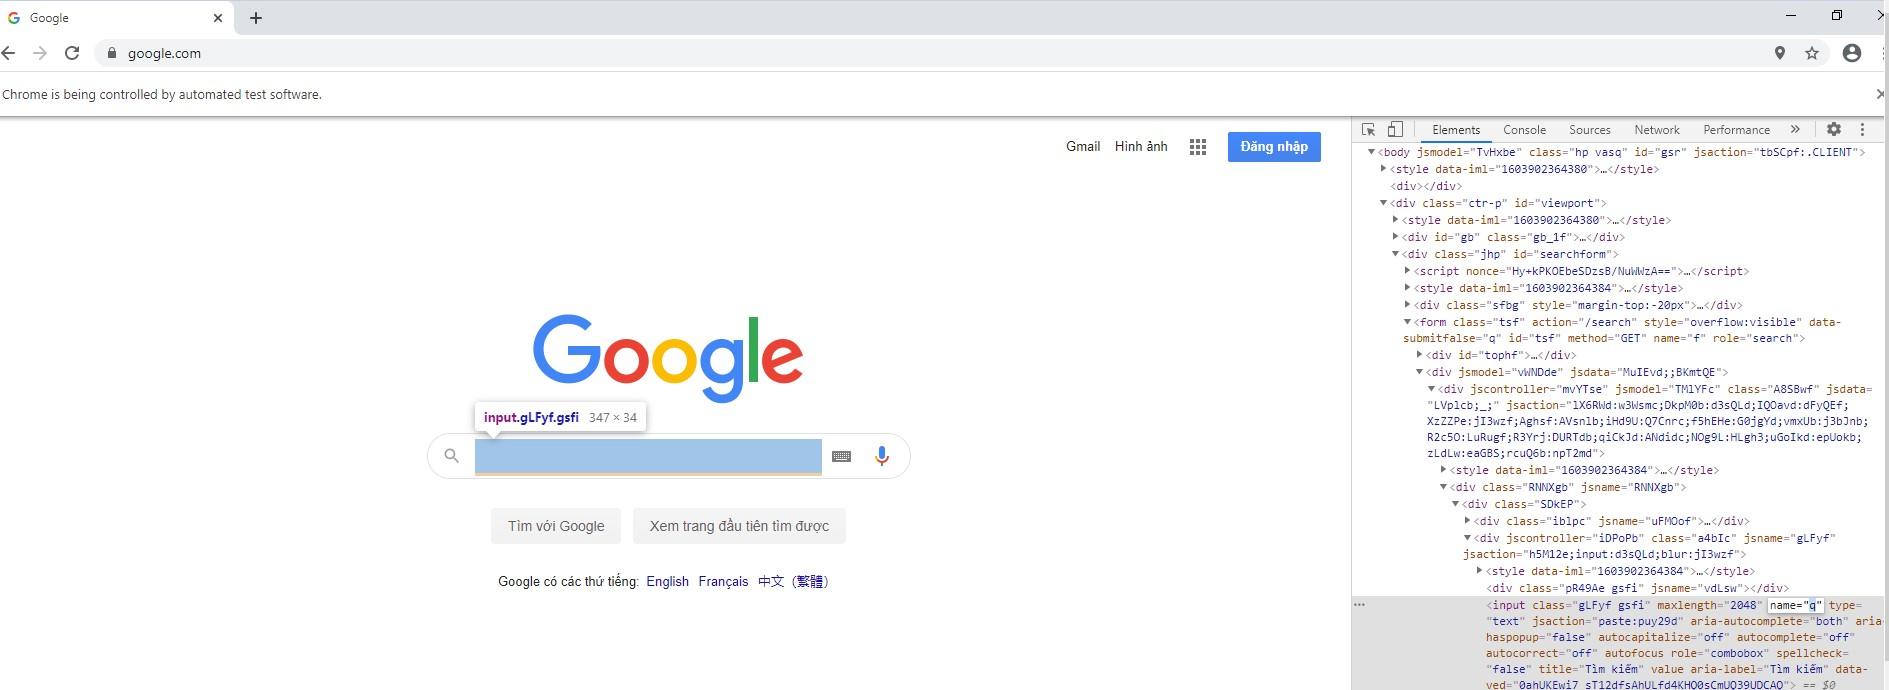

In [2]:
driver.get('https://www.google.com')

$\qquad$ We can see that, `name = "q"`, hence we will use the method 

                                webdriver.find_element_by_name('q')
                              

In [3]:
# locate search form by_name
search_query = driver.find_element_by_name('q')

<selenium.webdriver.remote.webelement.WebElement (session="a2bb07ea01895ad277d0d5b41a1bc06d", element="5573405f-de1f-4666-b236-a550e0f2c8e1")>


$\qquad$ For example, we are looking for the information of `Pytorch` and `StyleGAN2`, then we let them in the `attribute: send_keys()`                                

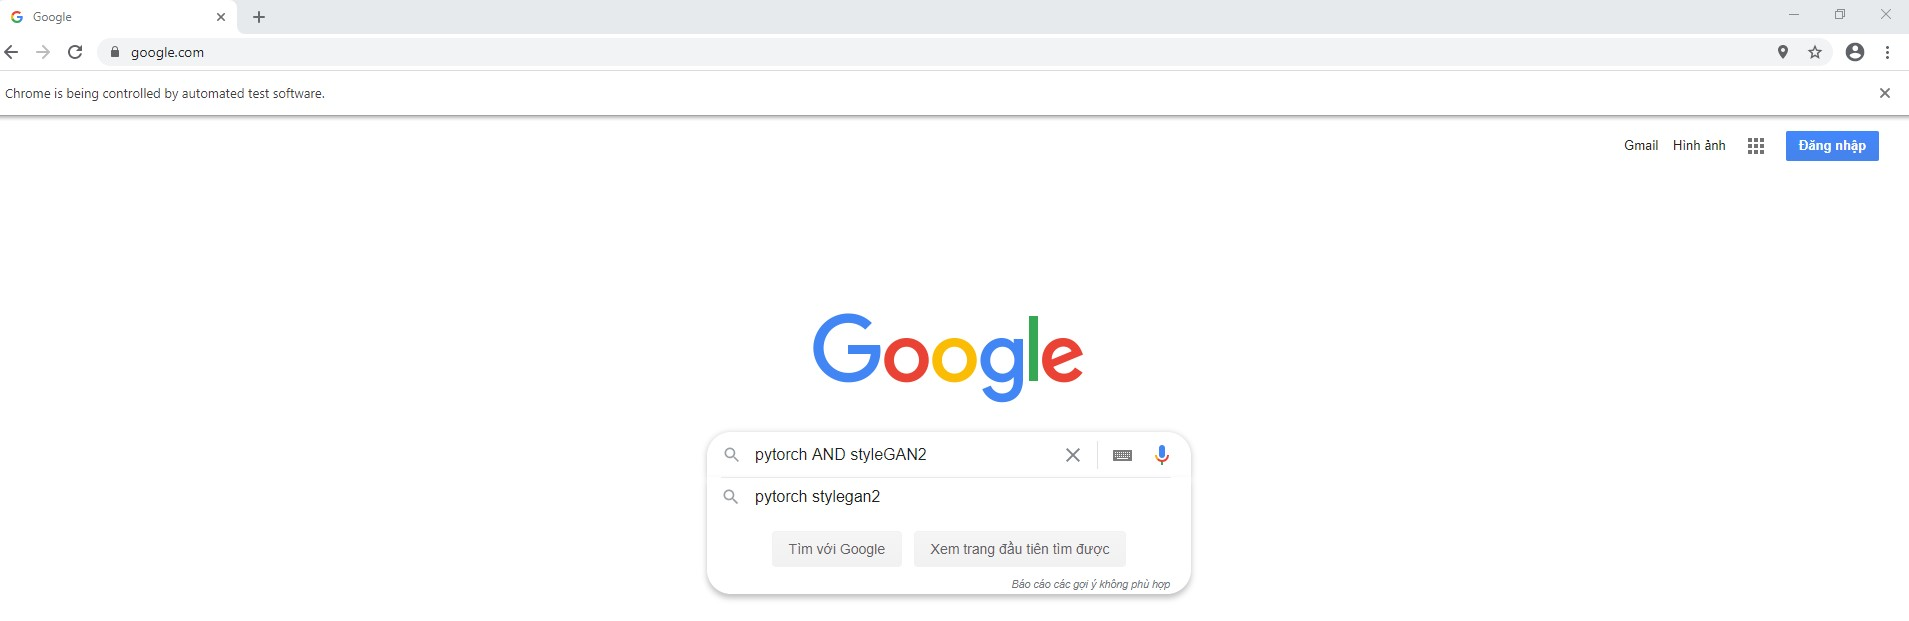

In [4]:
# Use "send_keys()"" to simulate the search text key strokes
search_query.send_keys('pytorch AND styleGAN2')

$\qquad$ Now, return your searching-results.

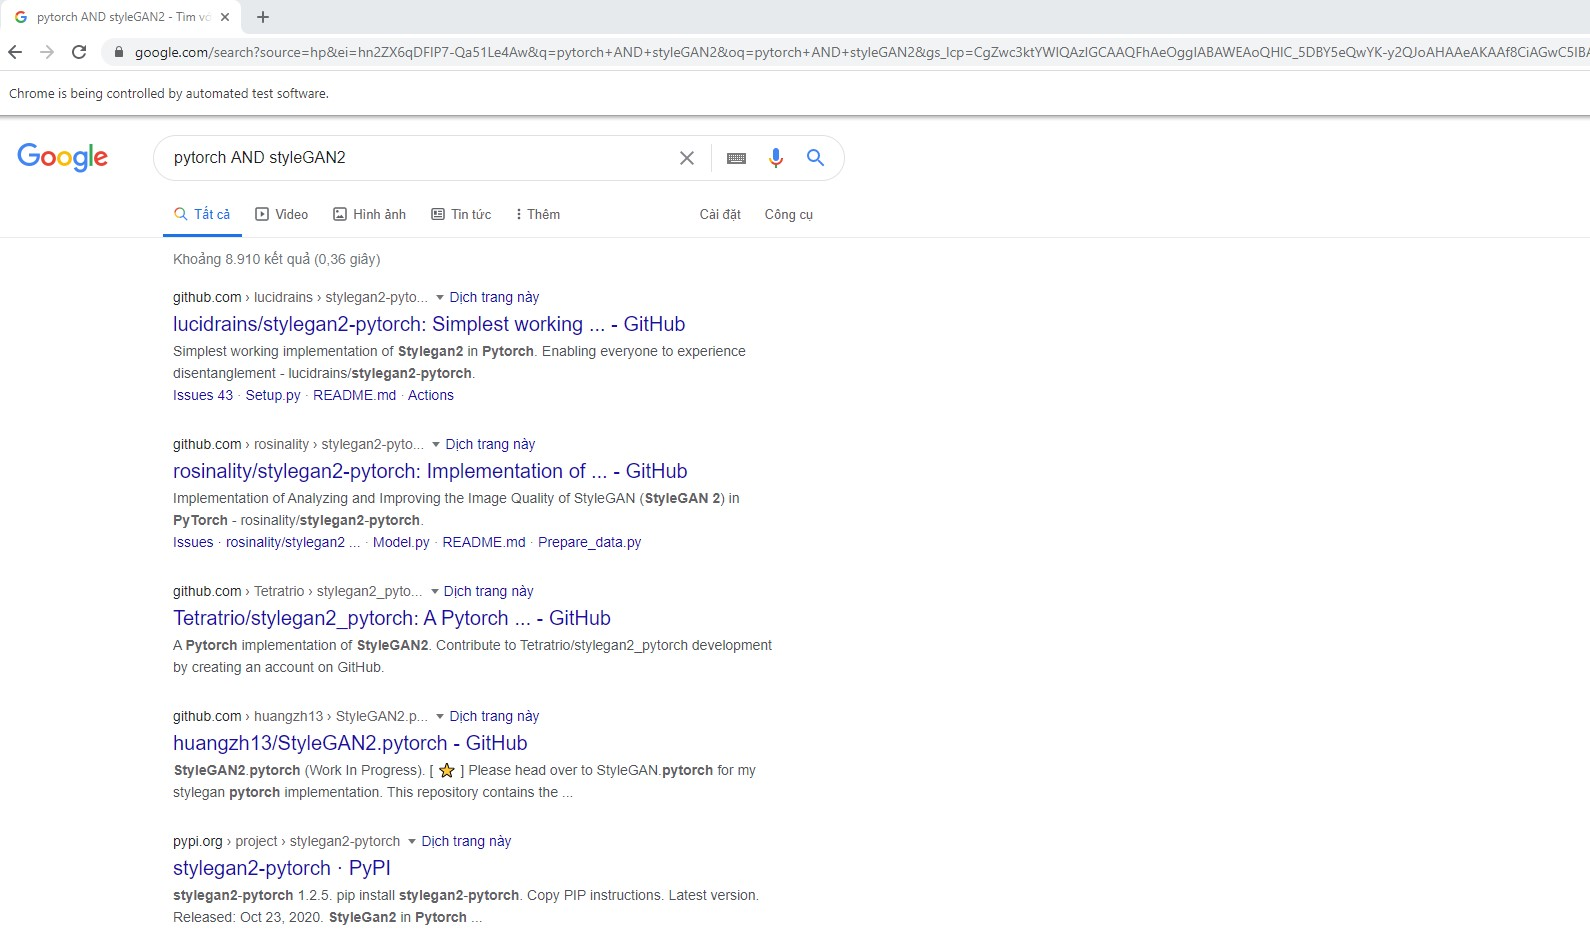

In [5]:
# Use ".send_keys()" to simulate the return key 
search_query.send_keys(Keys.RETURN)

### 1.2. Using `element: class`

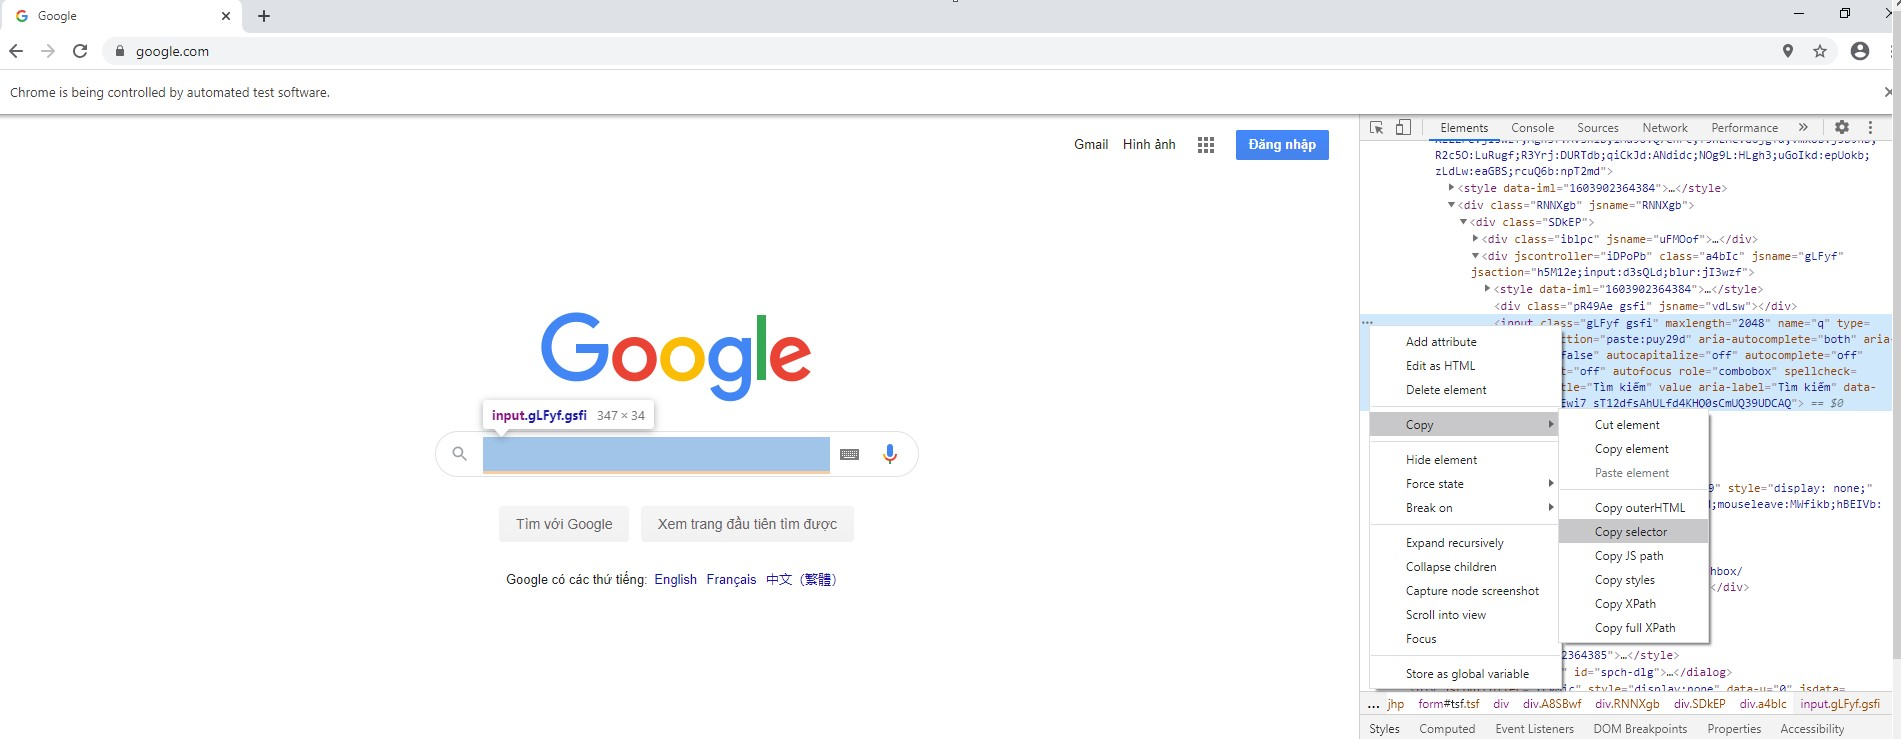

In [6]:
driver.get('https://www.google.com')

Likewise,

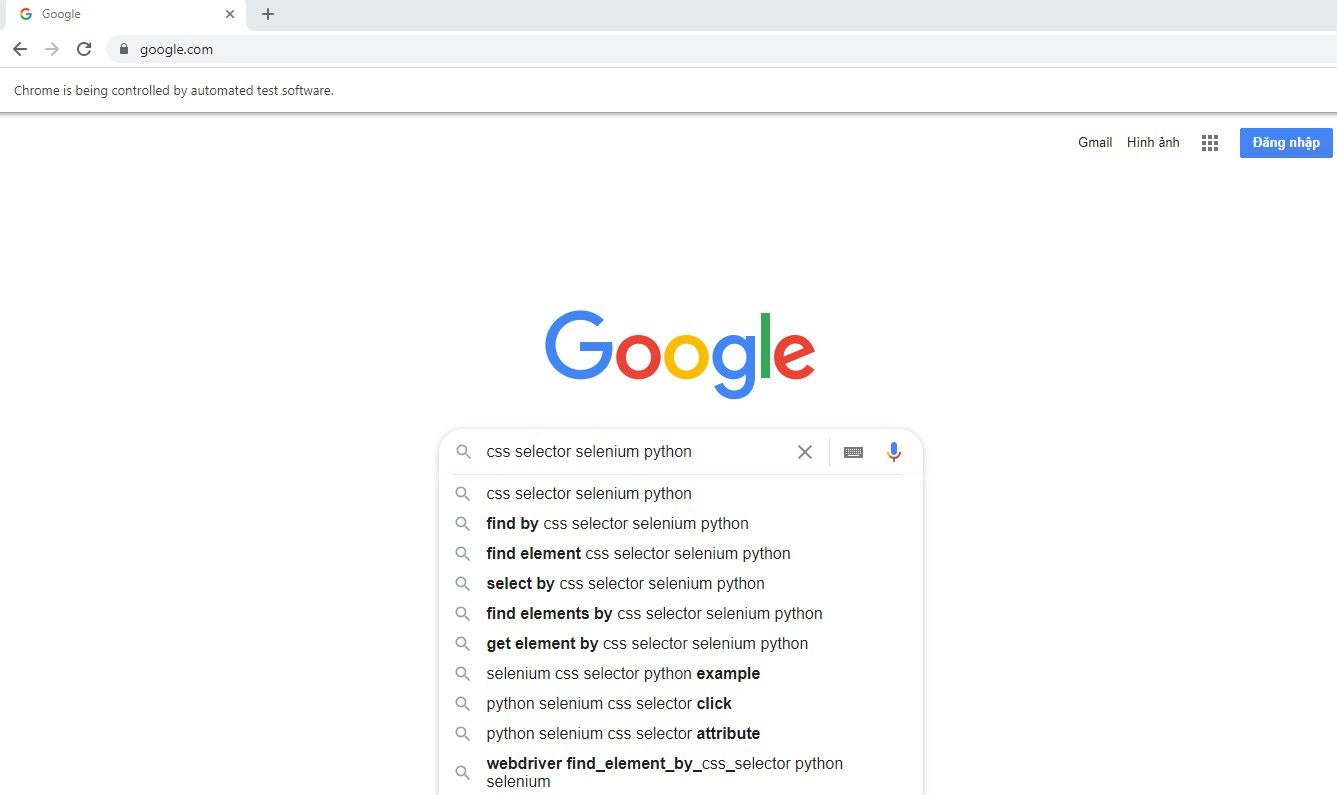

In [7]:
look_button = driver.find_element_by_css_selector("#tsf > div:nth-child(2) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input")
look_button.send_keys('css selector selenium python')
driver.save_screenshot('image.jpg')
Image('image.jpg')

### 1.3. Using the `xpath`

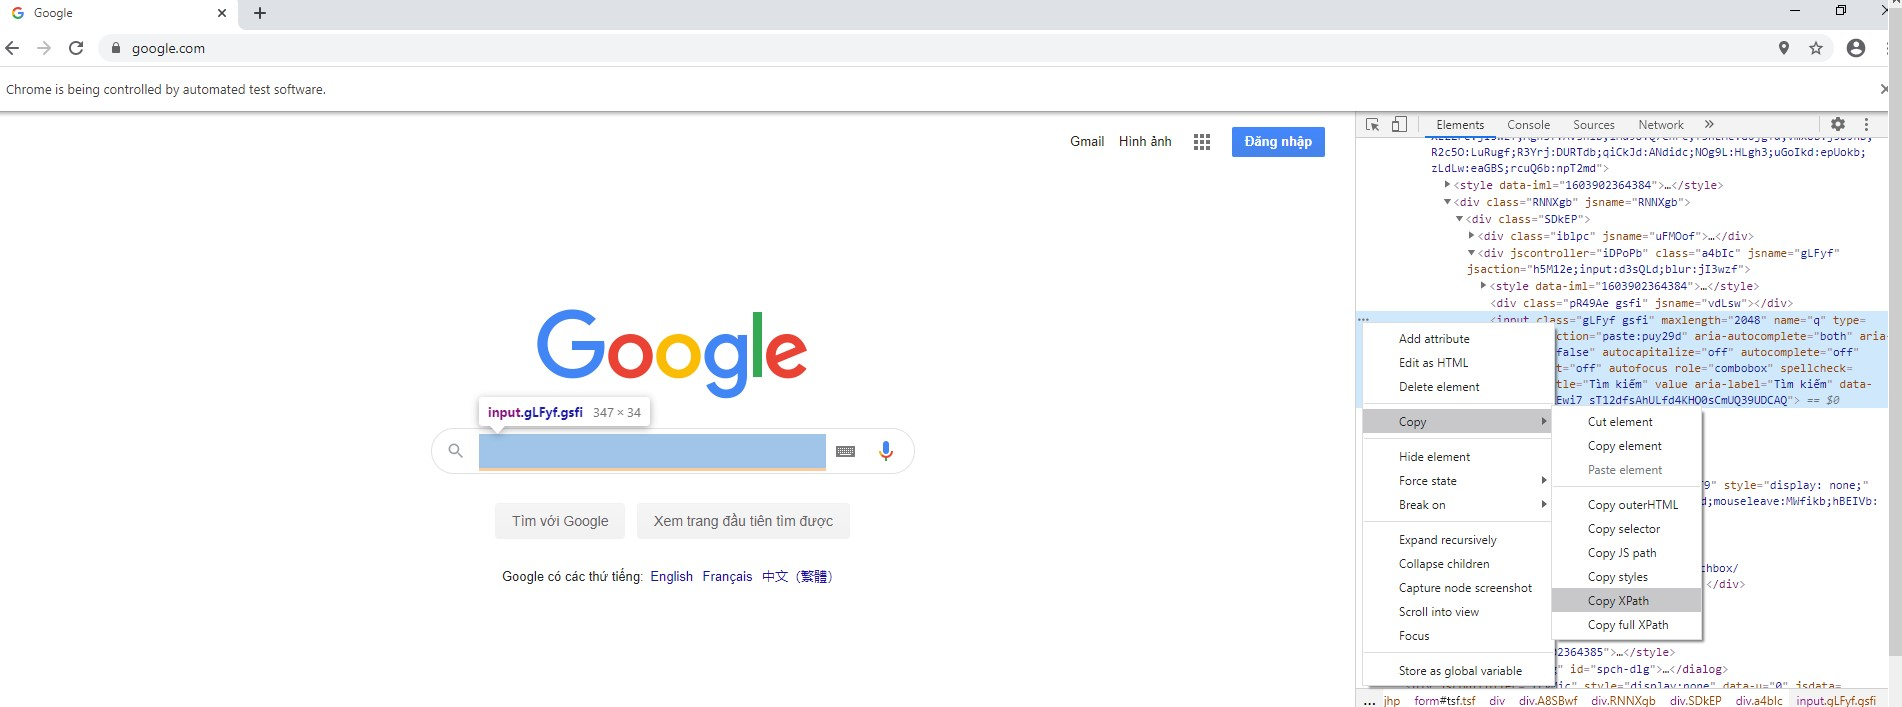

In [8]:
## illustration

Then,

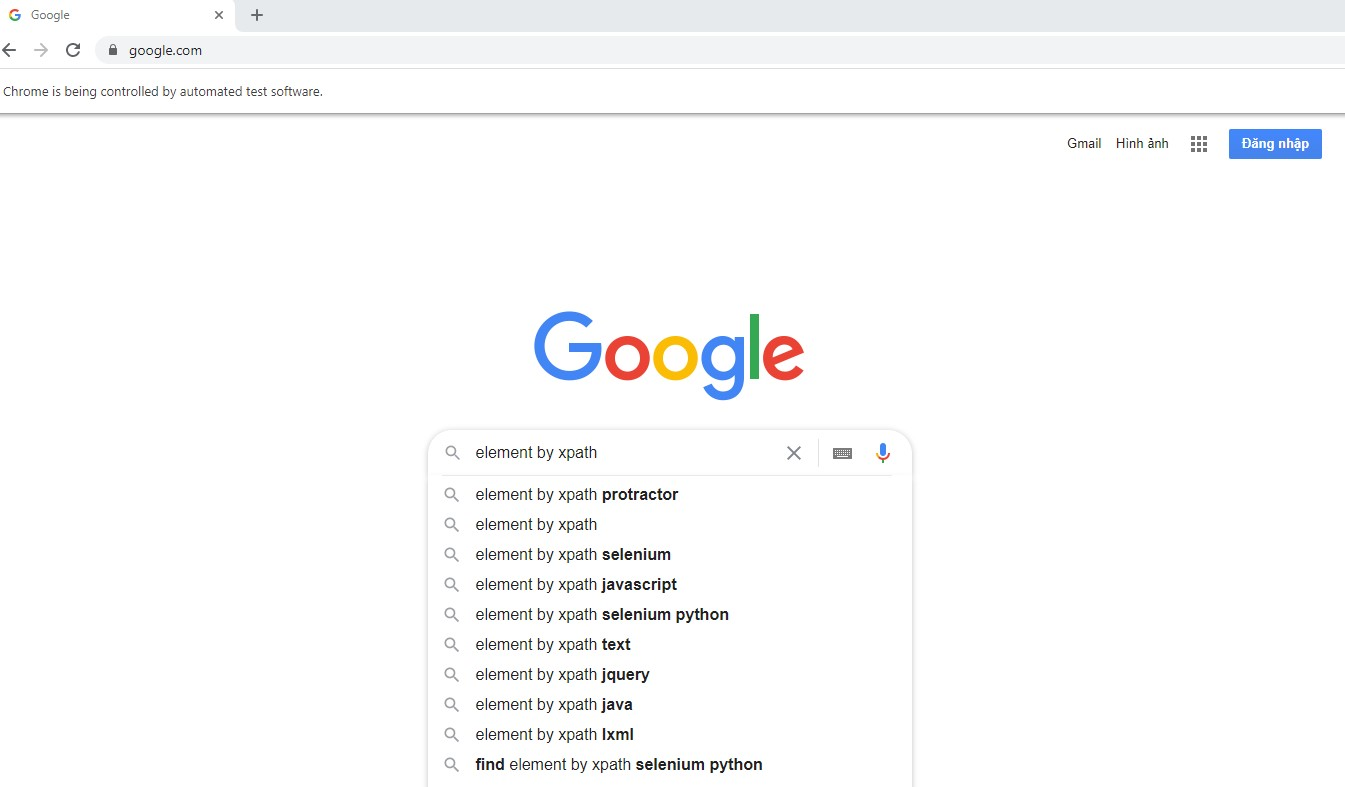

In [9]:
search_button = driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[1]/div/div[2]/input')
search_button.send_keys('element by xpath')

### Some example.
#### Example 1.1. `Search toolbar` from `github`.

<selenium.webdriver.remote.webelement.WebElement (session="e454f0fec5a2c92cbf8ba302ad348d9a", element="dc6993f5-0f4b-45af-9dcb-ea7f05ac9529")> 
 <selenium.webdriver.remote.webelement.WebElement (session="e454f0fec5a2c92cbf8ba302ad348d9a", element="dc6993f5-0f4b-45af-9dcb-ea7f05ac9529")>


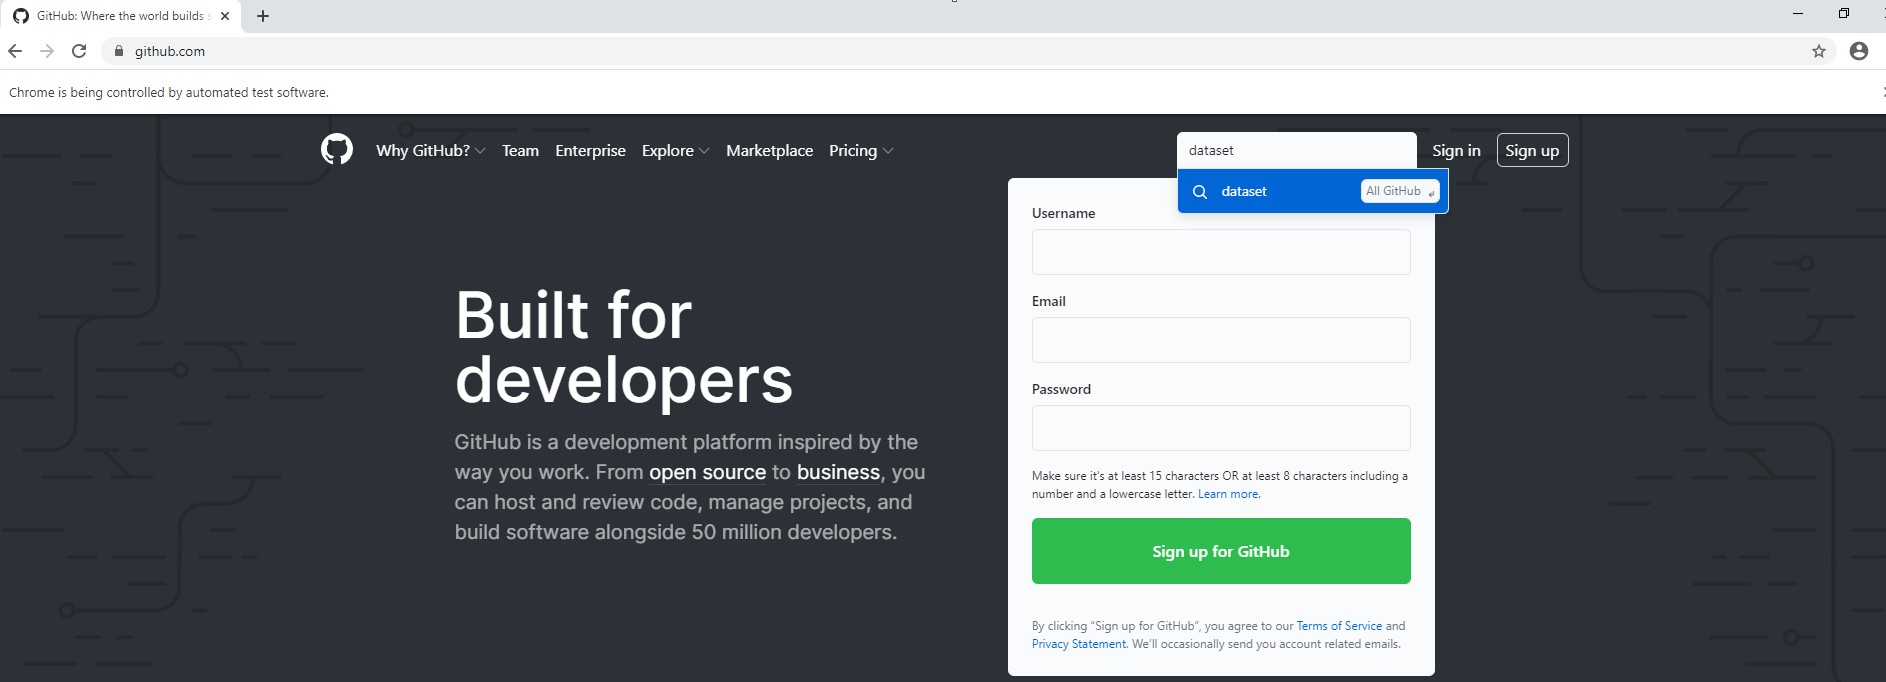

In [10]:
driver.get('https://github.com/')
search_button_xp = driver.find_element_by_xpath('/html/body/div[1]/header/div/div[2]/div[2]/div/div/div/form/label/input[1]')
search_button_css = driver.find_element_by_css_selector('body > div.position-relative.js-header-wrapper > header > div > div.HeaderMenu.HeaderMenu--logged-out.position-fixed.top-0.right-0.bottom-0.height-fit.position-lg-relative.d-lg-flex.flex-justify-between.flex-items-center.flex-auto > div.d-lg-flex.flex-items-center.px-3.px-lg-0.text-center.text-lg-left > div > div > div > form > label > input.form-control.input-sm.header-search-input.jump-to-field.js-jump-to-field.js-site-search-focus')
print(search_button_xp, '\n',search_button_css)

search_button_css.send_keys('dataset')
Image('../input/search-bar/screen_shoot_7.jpg') ## xoa

#### Example 1.2. `Search toolbar` from `youtube`.

In [11]:
driver.get('https://www.youtube.com/')
search_button_name = driver.find_element_by_name('search_query'); print('search_button_name', search_button_name)
search_button_css = driver.find_element_by_css_selector('#search'); print('search_button_css', search_button_css)
search_button_xp = driver.find_element_by_xpath('//*[@id="search"]'); print('search_button_xp', search_button_xp)

search_button_name
<selenium.webdriver.remote.webelement.WebElement (session="e454f0fec5a2c92cbf8ba302ad348d9a", element="3e927510-e3ed-4113-9631-061216ad7490")>
search_button_css
<selenium.webdriver.remote.webelement.WebElement (session="e454f0fec5a2c92cbf8ba302ad348d9a", element="518abcc5-344d-40c2-be21-53f25b3aacb4")>
search_button_xp
<selenium.webdriver.remote.webelement.WebElement (session="e454f0fec5a2c92cbf8ba302ad348d9a", element="518abcc5-344d-40c2-be21-53f25b3aacb4")>


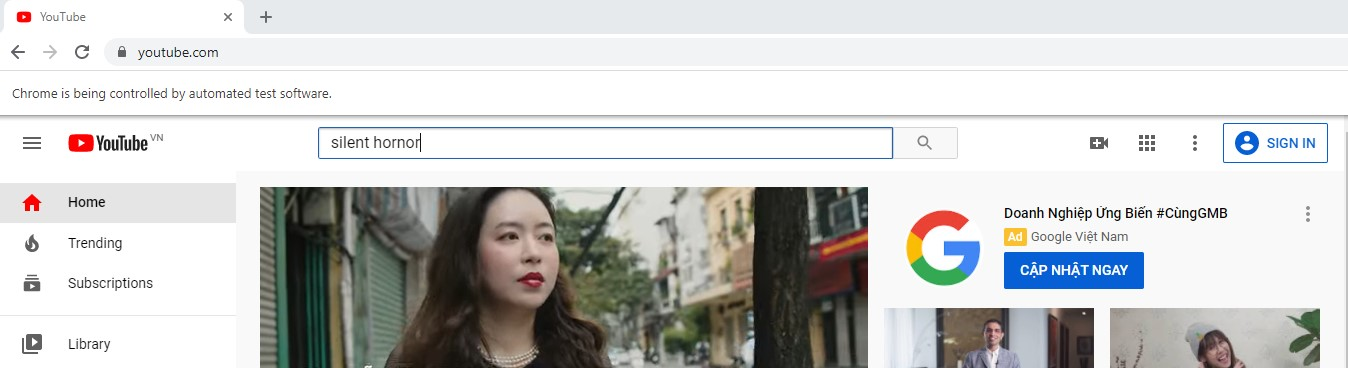

In [12]:
search_button_name.send_keys('silent hornor')

## 2. Another key-boards

**Syntax.**

                key_down(value, element=None)
For instance. One can use `key_down` method as an `Action chain` as below. This example clicks `Ctrl+C` after opening the webpage

                    ActionChains(driver).key_down(Keys.CONTROL).send_keys('C').key_up(Keys.CONTROL).perform()
                    
To demonstrate clearly, for pressing ctrl+f to open `search bar`, we can

                    Action.key_down(Keys.CONTROL).send_keys('F').key_up(Keys.CONTROL).perform()

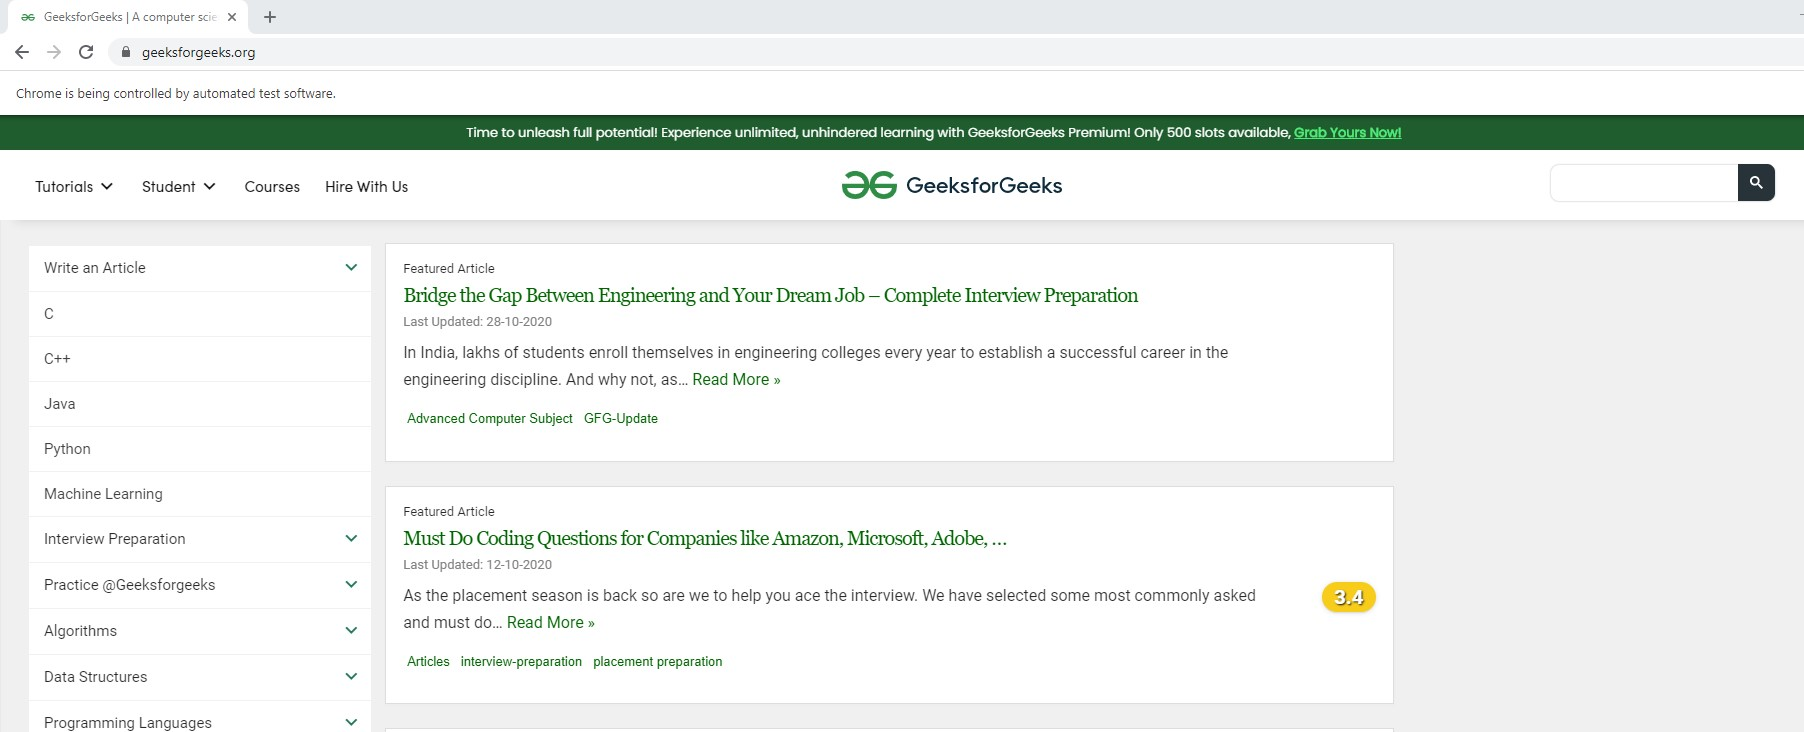

In [13]:
from selenium.webdriver.common.action_chains import ActionChains 
driver.get("https://www.geeksforgeeks.org/") 
# create action chain object 
action = ActionChains(driver) 
# perform the oepration 
action.key_down(Keys.CONTROL).send_keys('F').key_up(Keys.CONTROL).perform()

[Reference](https://www.geeksforgeeks.org/send_keys-method-action-chains-in-selenium-python/?ref=rp)